# Objective

In this project, i will try to perform some linear regression techniques in order to predict the Boston House Prices.

# Background

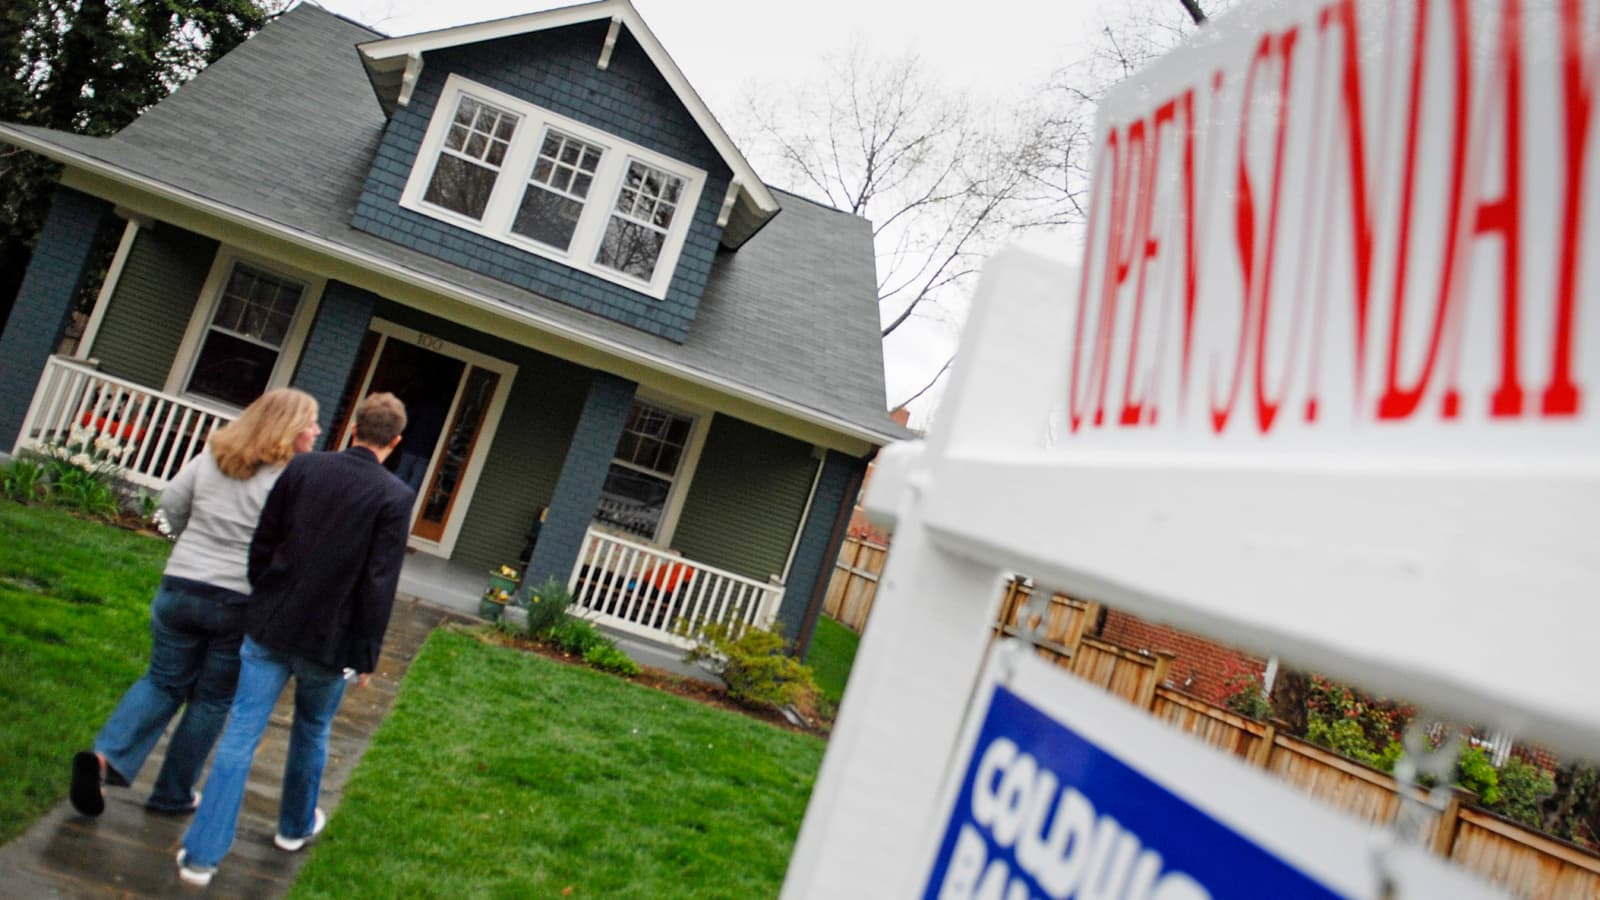

When people looking for a new house, the first aspect we should consider is absolutely the price of a house that should be adjusted and matched to our budget. The price of a house is usually determined by many factors, such as the number of room per house, land area, the access to highways, and much more. Therefore, i would like to create some machine learning models using [linear regression techniques](https://en.wikipedia.org/wiki/Linear_regression) to predict the house prices and to compare which model performing the best.

The dataset used in this project is the [Boston House Price dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) from the UCI Machine Learning Repository or you can download it via [kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) too. Each record in the dataset describes about concerns housing values in suburbs of Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows:
1. `CRIM` : per capita crime rate by town
2. `ZN` : proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS` : proportion of non-retail business acres per town
4. `CHAS` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)            
5. `NOX`: nitric oxides concentration (parts per 10 million)
6. `RM` : average number of rooms per dwelling
7. `AGE` : proportion of owner-occupied units built prior to 1940
8. `DIS` : weighted distances to five Boston employment centres
9. `RAD` : index of accessibility to radial highways
10. `TAX` : full-value property-tax rate per \$10,000
11. `PTRATIO`: pupil-teacher ratio by town
12. `BLACK` : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town         
13. `LSTAT` : \% lower status of the population
14. `MEDV` : Median value of owner-occupied homes in \$1000's

There aren't any missing attribute values in this dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso             
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Boston house prices dataset

The workflow proposed for this project are deﬁned as follows:
1. Splitting the data into `train`, `validate`, and `test` set.
2. Performing correlation plot on the `train` set. (looking for multicollinearity features)
3. Fitting some linear regression models on the `train` set.
4. Since we are going to use two main models: **ordinary** and **regularization** linear models. Therefore, for the **regularization**, we will choose the best $\lambda$ (or $\alpha$) hyperparameter from the `validate` set. We will do this manually.
5. Evaluating the model performance on the `test` set.
6. Finally, taking the best model performance as the final regressor model.

From the the data types, they seem to have desirable values. Our target variable is `MEDV` and the rest of the thirteen columns are the predictor variables (or features), that is `CRIM`, `ZN`, `INDUS`, `CHAS`, `NOX`, `RM`, `AGE`, `DIS`, `RAD`, `TAX`, `PTRATIO`, `BLACK`, and `LSTAT`.

In [2]:
# load the dataset
boston = pd.read_csv('dataset/boston.csv')
columns = [column.upper() for column in boston.columns]
boston.columns = columns
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Workflow

## 1. Splitting the data into train, validate, and test set

In [4]:
# take the features and target variable from boston dataset
X = boston.drop('MEDV', axis = 1)
y = boston['MEDV']

# split the main data (X and y)
# into 'pre_train' set and 'test' set
X_pre_train, X_test, y_pre_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# split the pre_train data (X_pre_train and y_pre_train) 
# into 'train' set and 'validate' set
X_train, X_validate, y_train, y_validate = train_test_split(X_pre_train, y_pre_train, test_size = 0.2, random_state = 12)

In [5]:
# check the shape
print('X and y, train set: {0} and {1}'.format(X_train.shape, y_train.shape))
print('X and y, validate set: {0} and {1}'.format(X_validate.shape, y_validate.shape))
print('X and y, test set: {0} and {1}'.format(X_test.shape, y_test.shape))

X and y, train set: (323, 13) and (323,)
X and y, validate set: (81, 13) and (81,)
X and y, test set: (102, 13) and (102,)


## 2. Performing correlation plot on the train set (looking for multicollinearity features)

By using correlation plot, we can check whether there are multicollinearity features in our dataset or not. What is multicollinearity? Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. You can read [this blog](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) for further information. For practical purpose in order to find multicollinearity features, **the correlation threshold values is** $>= 0.8$ , But this is not robust method.

We will use another method to detect multicollinearity by using **Variable Inflation Factors (VIF)**. [This blog](https://www.datasklr.com/ols-least-squares-regression/multicollinearity) provides how to compute multicollinearity using Variable Inflation Factors (VIF). Here are some brief explanations about VIF.

> "VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable."  

or

>"VIF score of an independent variable represents how well the variable is explained by other independent variables."

The formula of VIF:
> $ VIF = \frac{1}{1-R}$

Rule of thumb for FIV:
- VIF starts at 1 and has no upper limit.
- VIF = 1 &rarr; No multicollinearity.
- VIF between 3 and 10 &rarr; Moderate multicollinearity.
- VIF > 10 &rarr; Severe multicollinearity.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2


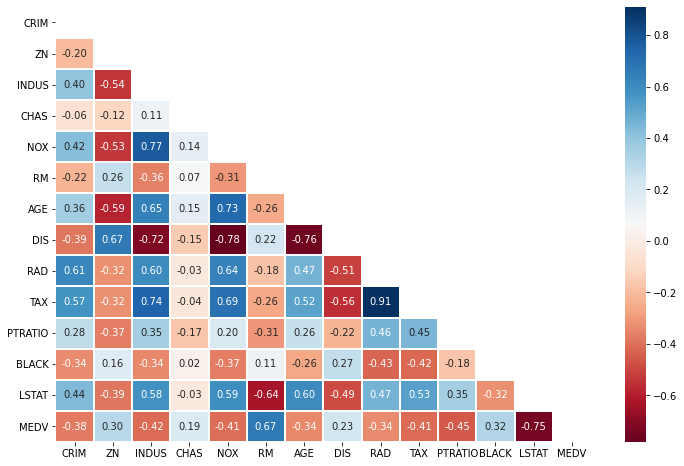

In [6]:
# correlation plot on the 'train' set (including both X_train and y_train)
boston_train = pd.concat([X_train, y_train], axis = 1)
display(boston_train.head())

# correlation heatmap 
plt.figure(figsize=(12, 8))
corr_matrix = boston_train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'RdBu', linewidths = 0.1,  mask = mask)
plt.show()

In [7]:
# function to compute FIV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calc_vif(X):
    X = sm.add_constant(X)
    # calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# compute VIF
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).round(2)

,features,VIF
0,const,579.07
10,TAX,9.62
9,RAD,7.66
5,NOX,4.56
3,INDUS,4.26
8,DIS,4.14
7,AGE,3.19
13,LSTAT,3.00
2,ZN,2.28
6,RM,1.93


**Insights**:
- From the resulting correlation plot, we see that `RAD` and `TAX` are highly correlated each other with pearson correlation value up to 0,91. So we have collinearity features between `RAD` and `TAX`. This statement is also confirmed by the high values of FIV which up to 7.66 and 9.62 for both `RAD` and `TAX`, respectively. Since `TAX` has the highest correlation to our target variable (`MEDV`) if we compared to `RAD`, then **we will drop** `RAD` feature.
- `DIS` has multicollinearity with `INDUS`, `AGE`, and `NOX`. In addition, `NOX` has collinearity with `INDUS`. We will hold `INDUS` and **drop** `DIS`, `AGE`, and `NOX` since it has higher correlation to `MEDV`.
- `TAX` has collinearity with `INDUS`, **we will drop** `TAX` since `INDUS` has higher correlation to `MEDV`.

**Summary of dropped columns**:
- `RAD`, `DIS`, `AGE`, `NOX`, and `TAX`.

In [8]:
# drop RAD, DIS, AGE, NOX, and TAX features
final_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'PTRATIO', 'BLACK', 'LSTAT']
X_train = X_train[final_features]
X_validate = X_validate[final_features]
X_test = X_test[final_features]

In [9]:
calc_vif(X_train).sort_values(by = 'VIF', ascending = False).round(2)

,features,VIF
0,const,362.48
8,LSTAT,2.44
3,INDUS,2.00
5,RM,1.75
2,ZN,1.53
1,CRIM,1.38
6,PTRATIO,1.35
7,BLACK,1.23
4,CHAS,1.10


,CRIM,ZN,INDUS,CHAS,RM,PTRATIO,BLACK,LSTAT,MEDV
309,0.34940,0.0,9.90,0,5.972,18.4,396.24,9.97,20.3
66,0.04379,80.0,3.37,0,5.787,16.1,396.90,10.24,19.4
53,0.04981,21.0,5.64,0,5.998,16.8,396.90,8.43,23.4
484,2.37857,0.0,18.10,0,5.871,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.10,0,6.312,20.2,388.62,10.58,21.2


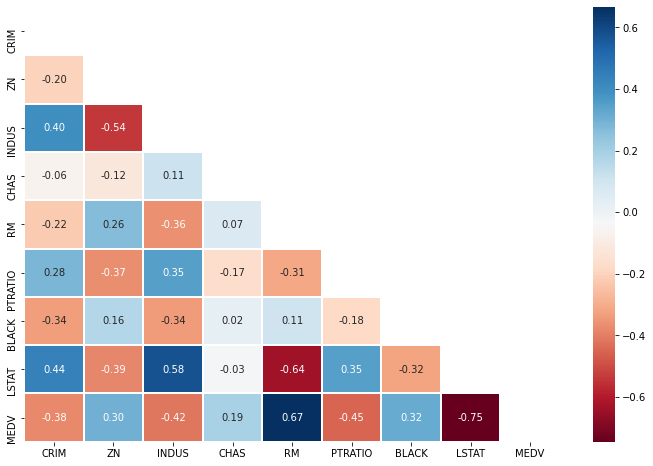

In [10]:
# correlation plot on the 'train' set (including both X_train and y_train)
boston_train = pd.concat([X_train, y_train], axis = 1)
display(boston_train.head())

# heatmap
plt.figure(figsize=(12, 8))
corr_matrix = boston_train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'RdBu', linewidths = 0.1,  mask = mask)
plt.show()

## 3. Fitting some linear regression models on the train set

### 3.1. Ordinary Linear Regression

In [11]:
# instantiate OLS regression model fit the model on training set
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

### 3.2. Regularized Linear Regression: Ridge

In [12]:
# instantiate ridge regression model and fit the model on training set
ridge_1 = Ridge(alpha = 0.01) # alpha = 0.01
ridge_1.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
ridge_2 = Ridge(alpha = 0.1) # alpha = 0.1
ridge_2.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
ridge_3 = Ridge(alpha = 1) # alpha = 1
ridge_3.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
ridge_4 = Ridge(alpha = 10) # alpha = 10
ridge_4.fit(X_train, y_train)

Ridge(alpha=10)

### 3.3. Regularized Linear Regression: Lasso

In [13]:
# instantiate ridge regression model and fit the model on training set
lasso_1 = Lasso(alpha = 0.01) # alpha = 0.01
lasso_1.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
lasso_2 = Lasso(alpha = 0.1) # alpha = 0.1
lasso_2.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
lasso_3 = Lasso(alpha = 1) # alpha = 1
lasso_3.fit(X_train, y_train)

# instantiate ridge regression model and fit the model on training set
lasso_4 = Lasso(alpha = 10) # alpha = 10
lasso_4.fit(X_train, y_train)

Lasso(alpha=10)

## 4. Choosing the best alpha from the validation set: Regularized regression

We will choose the best alpha ($\alpha$) using Root Mean Squared Error (RMSE) metric for ridge and lasso regressors.

### 4.1 Best alpha for Ridge regressor

Based on the result, i will choose `ridge_1`.

In [14]:
# find the best alpha for Ridge regressor
alphas = [0.01, 0.1, 1, 10]
regressors = [ridge_1, ridge_2, ridge_3, ridge_4]
RMSE_list = []
for alpha, regressor in zip(alphas, regressors):
    y_pred = regressor.predict(X_validate)
    RMSE = mean_squared_error(y_validate, y_pred)**0.5
    print('RMSE - {0}: {1}'.format(regressor, RMSE))
    RMSE_list.append(RMSE)

RMSE_list = list(zip(RMSE_list, regressors))
print('\nBest model for Ridge regressor:', min(RMSE_list)[1], ', with RMSE:', min(RMSE_list)[0])

RMSE - Ridge(alpha=0.01): 5.006250499783712
RMSE - Ridge(alpha=0.1): 5.006373574793556
RMSE - Ridge(alpha=1): 5.008052767851022
RMSE - Ridge(alpha=10): 5.04869611720928

Best model for Ridge regressor: Ridge(alpha=0.01) , with RMSE: 5.006250499783712


In [15]:
# the best regressor for Ridge
ridge_coef = pd.DataFrame({'features': X_train.columns, 'coef':ridge_1.coef_})
print('='*20 +' ridge_1 regressor '+ '='*20)
print(ridge_coef)
print('intercept:', ridge_1.intercept_)

==================== ridge_1 regressor ====================
  features      coef
0     CRIM -0.034912
1       ZN -0.001451
2    INDUS  0.088209
3     CHAS  4.029795
4       RM  4.111470
5  PTRATIO -0.702343
6    BLACK  0.011175
7    LSTAT -0.589170
intercept: 11.910328023274927


### 4.2. Best alpha for Lasso regressor

Based on the result, i will choose `lasso_2`.

In [16]:
# find the best alpha for Lasso regressor
alphas = [0.01, 0.1, 1, 10]
regressors = [lasso_1, lasso_2, lasso_3, lasso_4]
RMSE_list = []
for alpha, regressor in zip(alphas, regressors):
    y_pred = regressor.predict(X_validate)
    RMSE = mean_squared_error(y_validate, y_pred)**0.5
    print('RMSE - {0}: {1}'.format(regressor, RMSE))
    RMSE_list.append(RMSE)
    
RMSE_list = list(zip(RMSE_list, regressors))
print('\nBest model for Lasso regressor:', min(RMSE_list)[1], ', with RMSE:', min(RMSE_list)[0])

RMSE - Lasso(alpha=0.01): 5.006595223633848
RMSE - Lasso(alpha=0.1): 5.026707067831955
RMSE - Lasso(alpha=1): 5.737751221968028
RMSE - Lasso(alpha=10): 6.532603907451223

Best model for Lasso regressor: Lasso(alpha=0.01) , with RMSE: 5.006595223633848


In [17]:
# the best regressor for Lasso
lasso_coef = pd.DataFrame({'features': X_train.columns, 'coef':lasso_2.coef_})
print('='*20 +' lasso_2 regressor '+ '='*20)
print(lasso_coef)
print('intercept:', lasso_2.intercept_)

==================== lasso_2 regressor ====================
  features      coef
0     CRIM -0.035462
1       ZN -0.003498
2    INDUS  0.092754
3     CHAS  2.540437
4       RM  3.816359
5  PTRATIO -0.731297
6    BLACK  0.011066
7    LSTAT -0.608369
intercept: 14.660465317941412


## 5. Evaluating the model performance on the test set

We will evaluate our three regressor models on the test set, that is `OLS` regressor model, the best `Ridge` regressor model (`ridge_1`), and the best `Lasso` regressor model (`lasso_2`).

In [18]:
# evaluate the model performance on the test set
final_regressors = [OLS, ridge_1, lasso_2]
RMSE_list = []
for regressor in final_regressors:
    y_pred = regressor.predict(X_test)
    RMSE = mean_squared_error(y_test, y_pred)**0.5
    print('RMSE - {0}: {1}'.format(regressor, RMSE))
    RMSE_list.append(RMSE)

RMSE - LinearRegression(): 4.902716429061948
RMSE - Ridge(alpha=0.01): 4.902690784383208
RMSE - Lasso(alpha=0.1): 4.905675606475196


Let's check how the Bias-Variance Trade-Off in our model. Here are some blogs that explain how to estimate the Bias-Variance Trade-Off values from our model using `mlxtend` package. ([source 1](https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/) and [source 2](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#overview)).

In [19]:
# import the package
from mlxtend.evaluate import bias_variance_decomp

# OLS regressor
mse, bias, var = bias_variance_decomp(OLS, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
print('OLS    : RMSE = {0:.3f}, MSE = {1:.3f}, bias = {2:.3f}, variance = {3:.3f}'.format(mse**0.5, mse, bias, var))

# ridge_3 regressor
mse, bias, var = bias_variance_decomp(ridge_1, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
print('ridge_1: RMSE = {0:.3f}, MSE = {1:.3f}, bias = {2:.3f}, variance = {3:.3f}'.format(mse**0.5, mse, bias, var))

# lasso_1 regressor
mse, bias, var = bias_variance_decomp(lasso_2, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
print('lasso_2: RMSE = {0:.3f}, MSE = {1:.3f}, bias = {2:.3f}, variance = {3:.3f}'.format(mse**0.5, mse, bias, var))

OLS    : RMSE = 5.022, MSE = 25.223, bias = 23.953, variance = 1.269
ridge_1: RMSE = 5.022, MSE = 25.222, bias = 23.953, variance = 1.269
lasso_2: RMSE = 5.015, MSE = 25.150, bias = 23.947, variance = 1.203


From the resulting RMSE, `OLS` performs the best as a regressor model instead of `Ridge` and `Lasso`, if we analyze the Bias-Variance Trade-Off values, the `variance` error using `OLS` model is the highest compared to the regularization model of `ridge_2` and `lasso_1`. We should consider a model that have less `variance` error in order to avoid the **overfitting problem**... Therefore, i choose `lasso_1` as the best regressor model since it has the lowest `variance` error and also has the lowest RMSE value.

Note: after fitting our model instance (`OLS`, `ridge_1`, and `lasso_2`) using `bias_variance_decomp`, we need to fit that model instance once more using `sklearn`.

In [20]:
OLS.fit(X_train, y_train)
ridge_1.fit(X_train, y_train)
lasso_2.fit(X_train, y_train)

Lasso(alpha=0.1)

## 6. Final model

**Lasso regressor**: `lasso_2`

==============================Lasso(alpha=0.1)==============================
using Test Set as the data to predict..

RMSE:  4.906
R_squared: 0.7054758785332347 



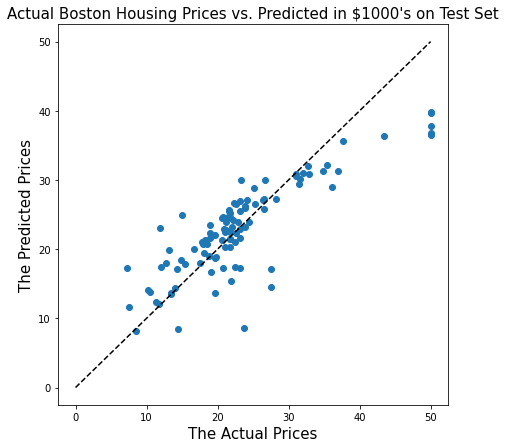

  features      coef
5  PTRATIO -0.731297
7    LSTAT -0.608369
0     CRIM -0.035462
1       ZN -0.003498
6    BLACK  0.011066
2    INDUS  0.092754
3     CHAS  2.540437
4       RM  3.816359
intercept: 14.660465317941412


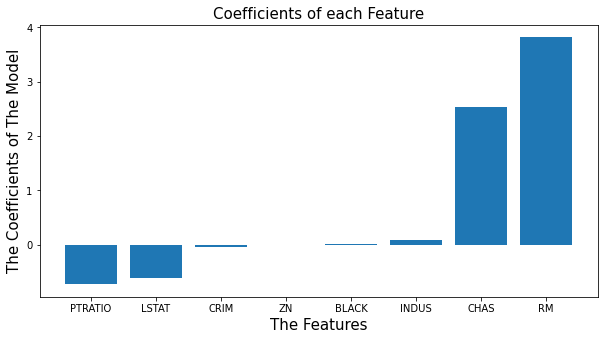

In [21]:
# using ridge_3 as the regressor
# function to summaries the regressor model
def final_model(model, X, y, name):
    print('='*30 + str(model) + '='*30)
    print('using {} as the data to predict..\n'.format(name))
    
    # the model performances metrics
    y_pred = model.predict(X)
    print('RMSE: ', (mean_squared_error(y, y_pred)**0.5).round(3))
    print('R_squared:', model.score(X, y), '\n')
    
    # plot the actual vs predicted values
    plt.figure(figsize = (7, 7))
    plt.scatter(y, y_pred)
    plt.plot([0, 50], [0, 50], '--k')
    plt.xlabel('The Actual Prices', fontsize = 15)
    plt.ylabel('The Predicted Prices', fontsize = 15)
    plt.title("Actual Boston Housing Prices vs. Predicted in $1000's on {}".format(name), fontsize=15)
    plt.axis('tight')
    plt.show()
    
    # the coefficient and intercept of the model
    model_coef = pd.DataFrame({'features': X.columns, 'coef':model.coef_})
    model_coef = model_coef.sort_values(by = 'coef')
    print(model_coef)
    print('intercept:', model.intercept_)
    
    # plot the coefficient of the model as a barplot
    plt.figure(figsize = (10, 5))
    plt.bar(model_coef['features'], model_coef['coef'])
    plt.title('Coefficients of each Feature', fontsize = 15)
    plt.xlabel('The Features', fontsize = 15)
    plt.ylabel('The Coefficients of The Model', fontsize = 15)
    return model_coef

# print the model summary on the test set
model_coef = final_model(lasso_2, X_test, y_test, 'Test Set')

# Interpretations

- We got our best model performace by using `lasso_2`.
- `lasso_2` is a `Lasso` regressor with regularization $\alpha = 0.1$.
- The strongest coefficient features (not below one) for `lasso_2` regressor are `RM`, `CHAS`, `PTRATIO`, and `LSTAT`.
    - `RM` describes the average number of rooms per dwelling. 
    - `CHAS` describes whether the house bounds to Charles River in Boston or not.
    - `PTRATIO` describes the upil-teacher ratio by town
    - `LSTAT` describes the % lower status of the population.
- Coefficients interpretation.
    - An increase of 1 point in `RM`, while the other features are kept fixed, then the house price (`MEDV`) increases by 3.816359 point.
    - An increase of 1 point in `CHAS`, while the other features are kept fixed, then the house price (`MEDV`) increases by 2.540437 point.
    - An increase of 1 point in `PTRATIO`, while the other features are kept fixed, then the house price (`MEDV`) decreases by -0.731297 point.
    - An increase of 1 point in `LSTAT`, while the other features are kept fixed, then the house price (`MEDV`) decreases by -0.608369 point.

# Conclusions

- The House Prices in boston are most influenced by features `RM`, `CHAS`, `PTRATIO`, and `LSTAT`.
- `RM` is the highest coefficient parameter affecting house prices in Boston.
- The y-intercept can be interpreted that in general the starting price of a house in Boston 1979 would be around 14.66K \$.
- The model of `lasso_2` suffers from high bias and low variance. This condition indicates that our model is too simple and leads to underfitting the data. We should use more complex machine learning models like bagging, random forest, or boosting. This also indicates that the Boston House Prices problem can't be simplified by a simple linear model.